In [1]:
import json
import re
from typing import Dict, List, Tuple, Any

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils


In [8]:
file_path = utils.most_recent_log()
sandbox_logs, activities_log, trade_history = utils.load_log_file(file_path)
kelp = utils.partition_prices(activities_log, ["KELP", "RESIN", "SQUID"])[0]

utils.plot_market_data(sandbox_logs, activities_log)

KeyError: 'product'

In [3]:
sandbox_logs

,sandboxLog,lambdaLog,timestamp
0,,,0
1,,,100
2,,,200
3,,,300
4,,,400
...,...,...,...
995,,,99500
996,,,99600
997,,,99700
998,,,99800


In [4]:
activities_log

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1834,23,NaN,NaN,NaN,NaN,1838,23,NaN,NaN,NaN,NaN,1836.0,0.0
1,1,0,RAINFOREST_RESIN,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.0
2,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.0
3,1,100,KELP,2034,1,2033.0,2.0,2032.0,22.0,2035,22,NaN,NaN,NaN,NaN,2034.5,0.0
4,1,100,SQUID_INK,1837,1,1836.0,2.0,1835.0,22.0,1839,22,NaN,NaN,NaN,NaN,1838.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,99800,SQUID_INK,1814,26,NaN,NaN,NaN,NaN,1817,26,NaN,NaN,NaN,NaN,1815.5,0.0
2996,1,99800,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10002,5,10004.0,1.0,10005.0,25.0,9999.0,0.0
2997,1,99900,SQUID_INK,1816,27,NaN,NaN,NaN,NaN,1819,28,NaN,NaN,NaN,NaN,1817.5,0.0
2998,1,99900,RAINFOREST_RESIN,9998,6,9996.0,1.0,9995.0,27.0,10004,1,10005.0,27.0,NaN,NaN,10001.0,0.0


In [5]:
trade_history

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,,,KELP,SEASHELLS,2034,1
1,100,,,RAINFOREST_RESIN,SEASHELLS,10002,1
2,200,,,KELP,SEASHELLS,2035,1
3,200,,,RAINFOREST_RESIN,SEASHELLS,10004,1
4,200,,,SQUID_INK,SEASHELLS,1835,1
...,...,...,...,...,...,...,...
842,99700,,,KELP,SEASHELLS,2034,2
843,99700,,,RAINFOREST_RESIN,SEASHELLS,9995,2
844,99700,,,SQUID_INK,SEASHELLS,1813,2
845,99900,,,KELP,SEASHELLS,2035,1


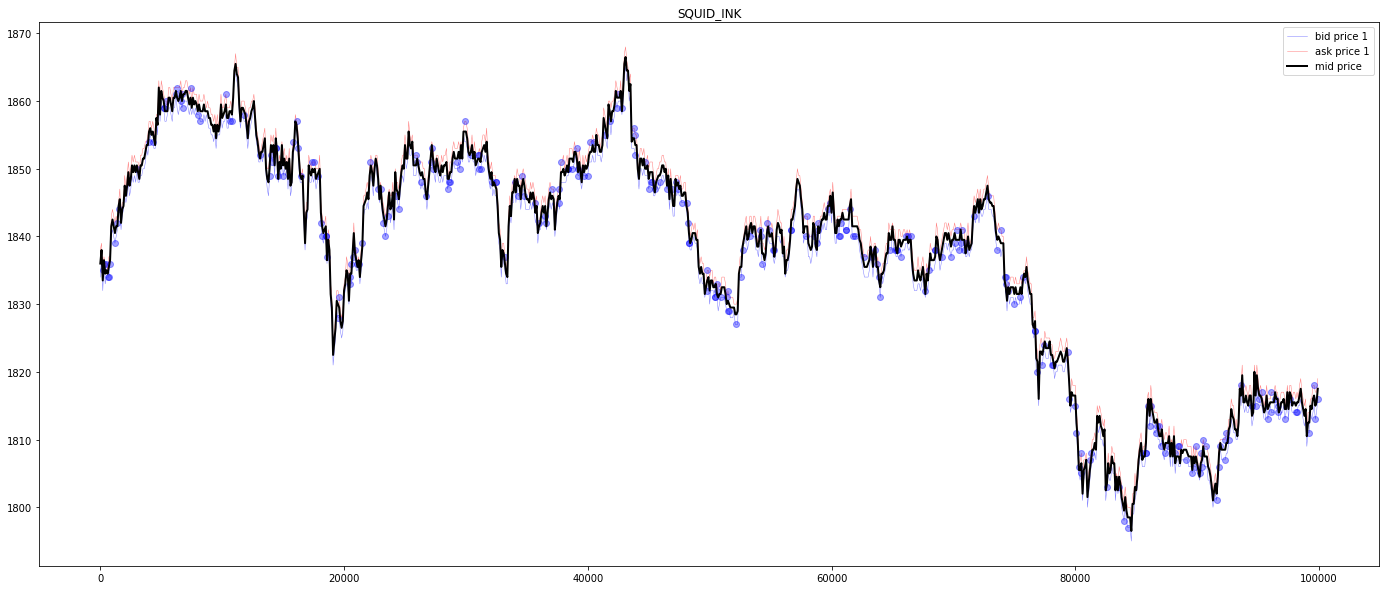

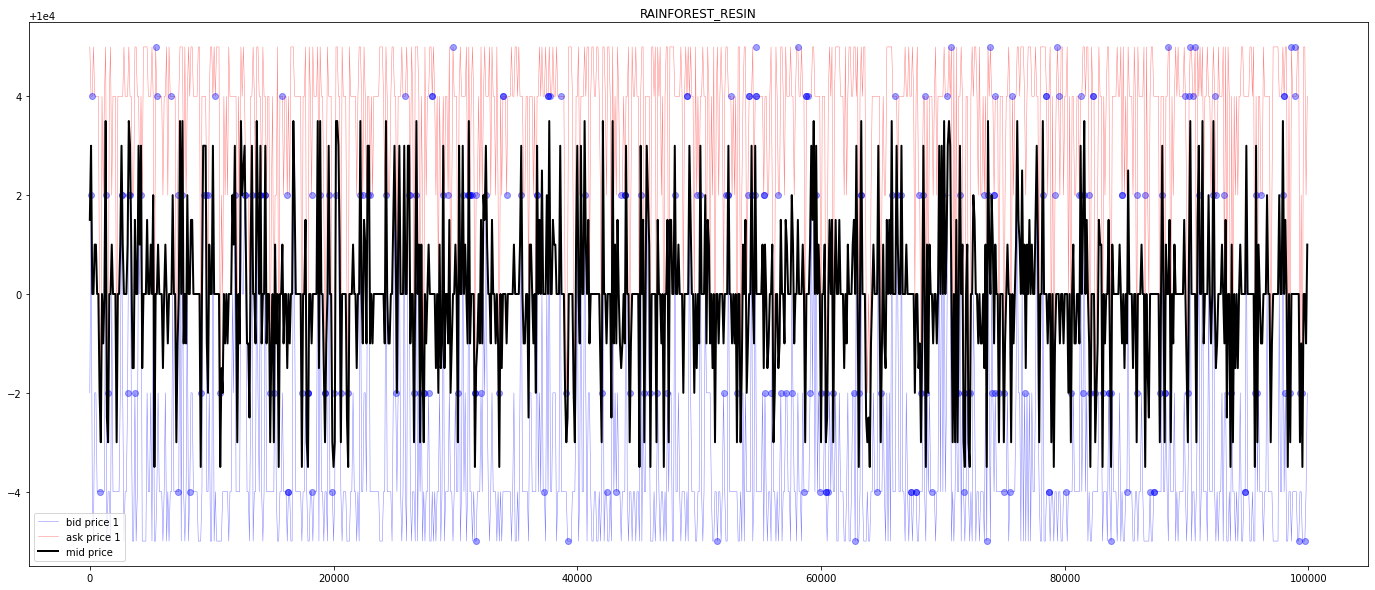

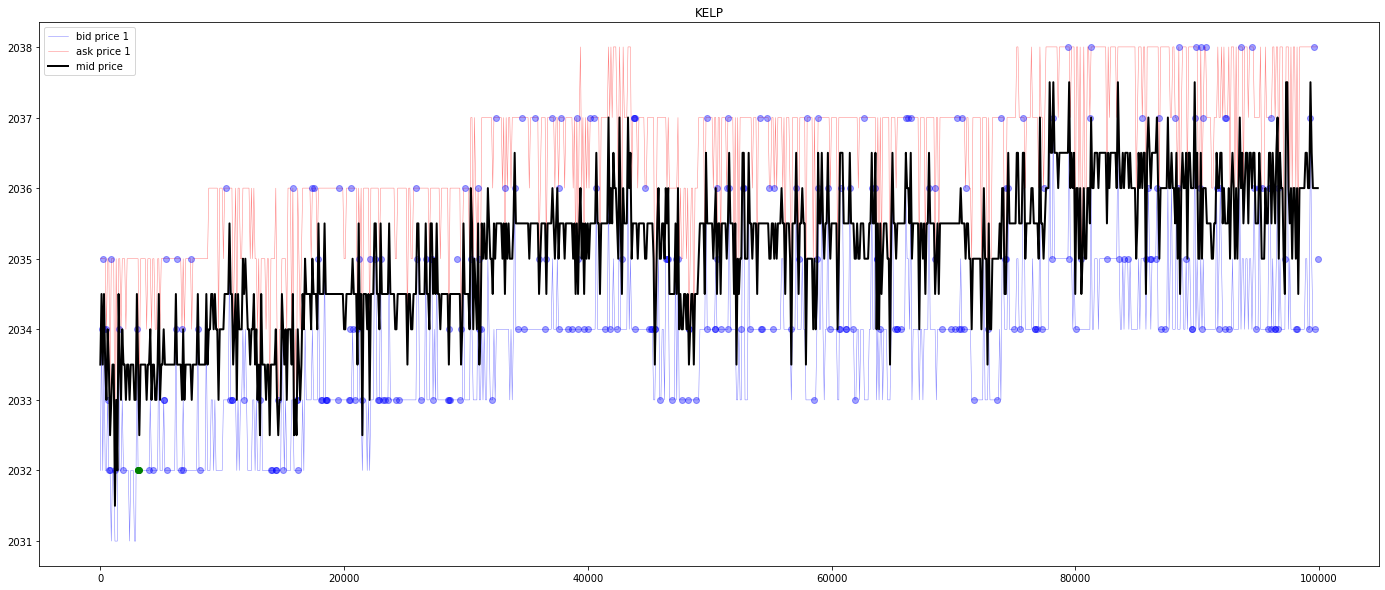

In [6]:
for product in activities_log['product'].unique():
    plt.figure(figsize=(24, 10))
    plt.title(product)

    product_log = activities_log[activities_log['product'] == product]

    
    plt.plot(product_log['timestamp'], product_log['bid_price_1'], label='bid price 1', color='blue', alpha=0.5, linewidth=0.5)
    plt.plot(product_log['timestamp'], product_log['ask_price_1'], label='ask price 1', color='red', alpha=0.5, linewidth=0.5)

    for trade in trade_history[trade_history['symbol'] == product].itertuples():
        if trade.buyer == 'SUBMISSION':
            # plot a red dot for a new order
            plt.plot(trade.timestamp, trade.price, 'ro')
        elif trade.seller == 'SUBMISSION':
            # plot a green dot for a new order
            plt.plot(trade.timestamp, trade.price, 'go')
        else:
            # plot a blue line for a trade
            plt.plot([trade.timestamp, trade.timestamp], [trade.price, trade.price], 'bo', alpha=0.2)

    plt.plot(product_log['timestamp'], product_log['mid_price'], label='mid price', color='black', linewidth=2)

    plt.legend()
    plt.show()
    